In [1]:
import pandas as pd
import os
import numpy as np
#Matplotlib forms basis for visalization in Python
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

#Increase the default plot size and set the color scheme
plt.rcParams['figure.figsize'] = 12, 9
plt.rcParams['image.cmap'] = 'viridis'


In [2]:
##To know path where we are
print(os.getcwd())

/home/ruralkan/code/jupyter/GabCeva


In [3]:
%%time
from pandas import ExcelWriter
from pandas import ExcelFile
#Export Excel files
stats = pd.read_excel('ceva418_para_rodrigo.xlsx',sheet_name='ceva418') 

CPU times: user 4min 50s, sys: 2.05 s, total: 4min 52s
Wall time: 4min 56s


In [4]:
stats.VALTOT18_cer[(stats.PAIS.isin(["BEL","CR","GT", "HON", "PAN", "SAL"])) & (stats.LAB=='CEVA')].sum()

165121.22187500002

In [5]:
stats.DESCRIP[(stats.PAIS.isin(["BEL","CR","GT", "HON", "PAN", "SAL"])) & (stats.LAB=='CEVA')].value_counts()

Gumboro virus vivovacuna aviar                                      23
Diluentes oculares                                                  12
Newcastle_activo_lasota_vacuna_aviar                                12
Viruela laringotraqueitis / viva / pollos                           11
Tranquilizantes felino                                               9
Newcastle bronquits (viva) vacuna_aviar                              8
Pulguicidas top spot                                                 7
Pasteurella aviar bacterina (colera aviar)                           7
Newcastle inactivado sola vacuna_aviar                               6
Newcastle bronquitis ibf reovirus vacuna aviar                       5
Anemia infecciosa vacuna aviar                                       5
Newcastle bronquits (muerta) vacuna_aviar                            5
Viruela encefalomielitis_vacuna_aviar                                4
Estabilizador de vacunas aviares                                     4
Inmuno

In [6]:
stats.loc[(stats.PAIS.isin(["BEL","CR","GT", "HON", "PAN", "SAL"])) & (stats['LAB'] == "CEVA") &(stats.DESCRIP.str.contains('porcina')),['DESCRIP','PRODUCTO_PRES_1', 'VALTOT18_cer']]

,DESCRIP,PRODUCTO_PRES_1,VALTOT18_cer
983,Inmunocastracion porcina,Ceva valora 100d mx,4828.117708
984,Inmunocastracion porcina,Ceva valora 100d mx,4828.117708
985,Actinobacillus pleuropneumoniae / haemophylus ...,Coglapix 100ml bte mx,4397.200000
5834,Circovirus vacuna porcinas,Circovac 25 dos x 1,0.000000
10911,Mycoplasma bacterina porcina,Hyogen 100ml,2586.988333
10933,Circovirus vacuna porcinas,Circovac 25d mx,51489.400000
11800,Inmunocastracion porcina,Ceva valora 100d mx,67382.498125
34480,Circovirus vacuna porcinas,Circovac 25d mx,29608.900000
34869,Mycoplasma bacterina porcina,Hyogen,0.000000
35010,Actinobacillus pleuropneumoniae / haemophylus ...,Coglapix,0.000000


In [7]:
stats.loc[((stats['LAB'] == "CEVA")&(stats.DESCRIP.str.startswith('Myco') | (stats.DESCRIP.str.startswith('Circovirus')) | (stats.DESCRIP.str.startswith('Actino')))),['LAB','DESCRIP','PRODUCTO_PRES_1', 'VALTOT18_cer']]

,LAB,DESCRIP,PRODUCTO_PRES_1,VALTOT18_cer
985,CEVA,Actinobacillus pleuropneumoniae / haemophylus ...,Coglapix 100ml bte mx,4397.200000
5834,CEVA,Circovirus vacuna porcinas,Circovac 25 dos x 1,0.000000
10911,CEVA,Mycoplasma bacterina porcina,Hyogen 100ml,2586.988333
10933,CEVA,Circovirus vacuna porcinas,Circovac 25d mx,51489.400000
34480,CEVA,Circovirus vacuna porcinas,Circovac 25d mx,29608.900000
34869,CEVA,Mycoplasma bacterina porcina,Hyogen,0.000000
35010,CEVA,Actinobacillus pleuropneumoniae / haemophylus ...,Coglapix,0.000000
35161,CEVA,Mycoplasma bacterina porcina,Hyogen 100ml,0.000000


In [35]:
vacunasCEVA = stats.loc[((stats.PAIS.isin(["BEL","CR","GT", "HON", "PAN", "SAL"])) & (stats['LAB'] == "CEVA") & (stats.DESCRIP.str.contains('porcina')) & (stats.DESCRIP.str.startswith('Myco') | (stats.DESCRIP.str.startswith('Circovirus')) | (stats.DESCRIP.str.startswith('Actino')))),['LAB','DESCRIP','PRODUCTO_PRES_1', 'VALTOT18_cer']]

In [46]:
pd.crosstab(vacunasCEVA.DESCRIP, vacunasCEVA.PRODUCTO_PRES_1, values=vacunasCEVA.VALTOT18_cer, margins=True, aggfunc=np.sum).T

DESCRIP,Actinobacillus pleuropneumoniae / haemophylus bacterina porcina,Circovirus vacuna porcinas,Mycoplasma bacterina porcina,All
PRODUCTO_PRES_1,,,,
Circovac 25 dos x 1,NaN,0.0,NaN,0.000000
Circovac 25d mx,NaN,81098.3,NaN,81098.300000
Coglapix,0.0,NaN,NaN,0.000000
Coglapix 100ml bte mx,4397.2,NaN,NaN,4397.200000
Hyogen,NaN,NaN,0.000000,0.000000
Hyogen 100ml,NaN,NaN,2586.988333,2586.988333
All,4397.2,81098.3,2586.988333,88082.488333


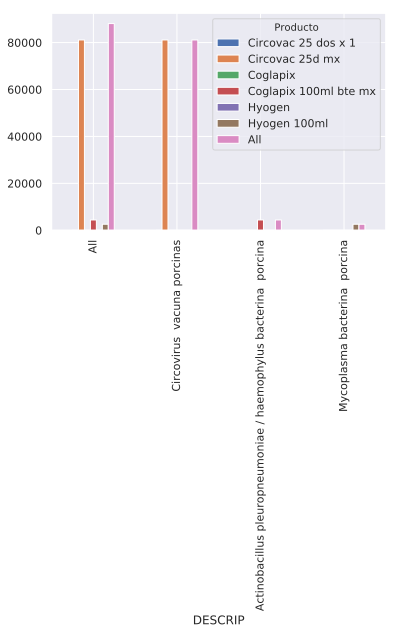

In [67]:
ct=pd.crosstab(vacunasCEVA.DESCRIP, vacunasCEVA.PRODUCTO_PRES_1, values=vacunasCEVA.VALTOT18_cer, margins=True, aggfunc=np.sum).sort_values('All',ascending=False)
ct.plot.bar(stacked=False)
plt.legend(title='Producto')

plt.show()

In [91]:
stats.loc[(stats.PAIS.isin(["BEL","CR","GT", "HON", "PAN", "SAL"])) & stats.LAB.isin(["CEVA", "BOEHRINGER", "MSD", "ELANCO"]) &(stats.DESCRIP.str.contains('porcina')) & (stats.DESCRIP.str.startswith('Myco') | (stats.DESCRIP.str.startswith('Circovirus')) | (stats.DESCRIP.str.startswith('Actino'))),['DESCRIP','PRODUCTO_PRES_1', 'VALTOT18_cer']]

,DESCRIP,PRODUCTO_PRES_1,VALTOT18_cer
648,Circovirus vacuna porcinas,Porcilis pcv 1x50ds,4.332000e+04
789,Circovirus vacuna porcinas,Porcilis pcv 1x100ds,8.445600e+04
985,Actinobacillus pleuropneumoniae / haemophylus ...,Coglapix 100ml bte mx,4.397200e+03
1214,Circovirus vacuna porcinas,Porcilis pcv,8.445600e+04
5830,Circovirus vacuna porcinas,Circumvent pcv m 1 x 100ml,1.970500e+05
5831,Circovirus vacuna porcinas,Circumvent pcv 1 x 250ds,1.892800e+05
5832,Circovirus vacuna porcinas,Ingelvac circoflex,1.586949e+05
5834,Circovirus vacuna porcinas,Circovac 25 dos x 1,0.000000e+00
5835,Circovirus vacuna porcinas,Circumvent pcv 1 x 500ml_/,0.000000e+00
5836,Circovirus vacuna porcinas,Circumvent pcv 1x50ds 100ml,1.198246e+06


In [90]:
stats.loc[((stats.PAIS.isin(["BEL","CR","GT", "HON", "PAN", "SAL"])) & stats.LAB.isin(["CEVA", "BOEHRINGER", "MSD", "ELANCO"])  &(stats.DESCRIP.str.contains('porcina')),['DESCRIP','PRODUCTO_PRES_1', 'VALTOT18_cer']]

,LAB,DESCRIP,PRODUCTO_PRES_1,VALTOT18_cer


In [92]:
vacunasMSD = stats.loc[((stats.PAIS.isin(["BEL","CR","GT", "HON", "PAN", "SAL"]))&(stats['LAB'] == "MSD")&(stats.DESCRIP.str.contains('porcina')) &(stats.DESCRIP.str.startswith('Myco') | (stats.DESCRIP.str.startswith('Circovirus')) | (stats.DESCRIP.str.startswith('Actino')))),['LAB','DESCRIP','PRODUCTO_PRES_1', 'VALTOT18_cer']]

In [93]:
pd.crosstab(vacunasMSD.DESCRIP, vacunasMSD.PRODUCTO_PRES_1, values=vacunasMSD.VALTOT18_cer, margins=True, aggfunc=np.sum).T

DESCRIP,Actinobacillus pleuropneumoniae / haemophylus bacterina porcina,Circovirus vacuna porcinas,Circovirus vacuna porcinas + mycoplasma,Mycoplasma bacterina porcina,All
PRODUCTO_PRES_1,,,,,
Circumve t pcv m 1 x500ml,NaN,NaN,0.0,NaN,0.0
Circumvent pcv 1 x 100ml,NaN,0.0,NaN,NaN,0.0
Circumvent pcv 1 x 100ml_/,NaN,0.0,NaN,NaN,0.0
Circumvent pcv 1 x 250ds,NaN,179870.0,NaN,NaN,179870.0
Circumvent pcv 1 x 500ml_/,NaN,0.0,NaN,NaN,0.0
Circumvent pcv 1x250ds 500ml,NaN,0.0,NaN,NaN,0.0
Circumvent pcv 1x50ds 100ml,NaN,2673099.0,NaN,NaN,2673099.0
Circumvent pcv 250 ds,NaN,0.0,NaN,NaN,0.0
Circumvent pcv g2,NaN,230400.0,NaN,NaN,230400.0


In [96]:
vacunasELANCO = stats.loc[((stats.PAIS.isin(["BEL","CR","GT", "HON", "PAN", "SAL"]))&(stats['LAB'] == "ELANCO")&(stats.DESCRIP.str.startswith('Myco') | (stats.DESCRIP.str.startswith('Circovirus')) | (stats.DESCRIP.str.startswith('Actino')))),['LAB','DESCRIP','PRODUCTO_PRES_1', 'VALTOT18_cer']]

In [97]:
pd.crosstab(vacunasELANCO.DESCRIP, vacunasELANCO.PRODUCTO_PRES_1, values=vacunasELANCO.VALTOT18_cer, margins=True, aggfunc=np.sum).T

DESCRIP,Mycoplasma aviar bacterina,All
PRODUCTO_PRES_1,,
Avipro mg f,0.0,0.0
Avipro mg f diluent-clear,0.0,0.0
Avipro mg f lohmann lv-6820-g,0.0,0.0
Avipro mgf live c 100ulture,0.0,0.0
All,0.0,0.0


In [98]:
vacunasBOEHRINGER = stats.loc[((stats.PAIS.isin(["BEL","CR","GT", "HON", "PAN", "SAL"]))&(stats['LAB'] == "BOEHRINGER")&(stats.DESCRIP.str.contains('porcina')) &(stats.DESCRIP.str.startswith('Myco') | (stats.DESCRIP.str.startswith('Circovirus')) | (stats.DESCRIP.str.startswith('Actino')))),['LAB','DESCRIP','PRODUCTO_PRES_1', 'VALTOT18_cer']]

In [99]:
pd.crosstab(vacunasBOEHRINGER.DESCRIP, vacunasBOEHRINGER.PRODUCTO_PRES_1, values=vacunasBOEHRINGER.VALTOT18_cer, margins=True, aggfunc=np.sum).T

DESCRIP,Actinobacillus pleuropneumoniae / haemophylus bacterina porcina,Circovirus vacuna porcinas,Mycoplasma bacterina porcina,All
PRODUCTO_PRES_1,,,,
Ingelvac appx / 100 ml,46026.608333,NaN,NaN,4.602661e+04
Ingelvac circoflex,NaN,986108.558889,NaN,9.861086e+05
Ingelvac hp-1,35549.888889,NaN,NaN,3.554989e+04
Ingelvac mycoflex,NaN,NaN,52255.123889,5.225512e+04
Ingelvac mycoflex hsb,NaN,NaN,75845.967222,7.584597e+04
All,81576.497222,986108.558889,128101.091111,1.195786e+06


In [16]:
#Save Excel files
stats.to_excel('output.xlsx')